In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Tue, 02 Jul 2024 15:19


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"3,992,676","4,366,244","373,568",9.36%
Ramp,"174,119","63,633","-110,486",-63.45%
Total,"4,166,795","4,429,877","263,082",6.31%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"1,414,477","1,349,825","-64,652",-4.57%
Pierce,"2,752,318","3,080,052","327,734",11.91%
Total,"4,166,795","4,429,877","263,082",6.31%


----
### Daily | Scatterplots 

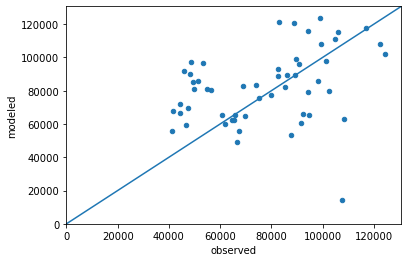

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.34389873330673504


---
By County

King r^2: 0.07753028948052525
Pierce r^2: 0.18788916521782933


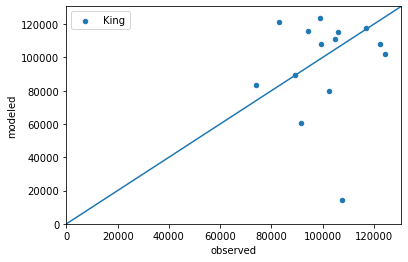

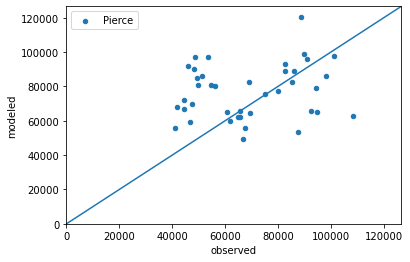

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.47593478729652205


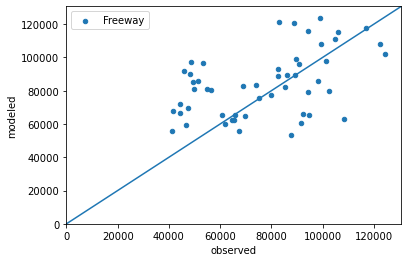

In [11]:
for factype in ['Freeway']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.6933683354306491


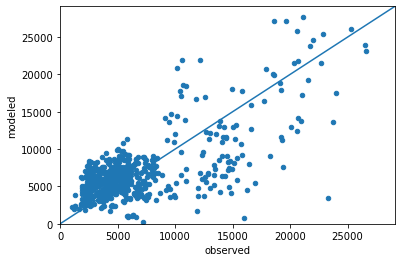

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"582,116","537,333",King,"-44,783",-7.69%
1,KENT,"552,442","502,557",King,"-49,885",-9.03%
2,SEATTLE - SOUTH OF CBD,"473,322","504,748",King,"31,426",6.64%
3,SHIP CANAL,"434,069","544,943",King,"110,874",25.54%
4,SOUTH BELLEVUE,"389,700","377,419",King,"-12,281",-3.15%
5,MILL CREEK,"387,047","381,958",King,"-5,089",-1.31%
6,KIRKLAND-REDMOND,"381,663","408,742",King,"27,079",7.09%
7,SEATTLE - NORTH,"341,251","385,243",King,"43,992",12.89%
8,TACOMA - EAST OF CBD,"300,463","348,766",Pierce,"48,303",16.08%
9,PARKLAND,"297,722","278,844",Pierce,"-18,878",-6.34%


r^2 : 0.9807959494349868


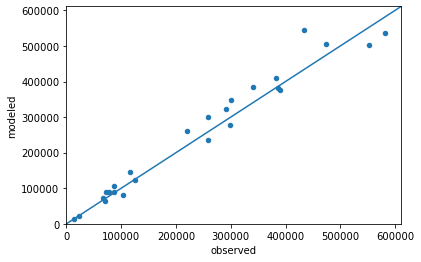

In [14]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_boardings','model_boardings','diff']] = df[['observed_boardings','model_boardings','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_boardings', ascending=False)

,agency,observed_boardings,model_boardings,diff,perc_diff
2,King County Metro,"253,314","369,225","115,911",45.76%
5,Sound Transit,"113,374","157,833","44,459",39.21%
0,Community Transit,"25,962","28,240","2,278",8.77%
4,Pierce Transit,"21,185","23,193","2,008",9.48%
6,Washington Ferries,"9,278","5,729","-3,549",-38.25%
3,Kitsap Transit,"7,789","28,232","20,443",262.46%
1,Everett Transit,"4,201","3,221",-980,-23.33%


----
### Key Routes
#### Ferries

In [16]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,W,759,940,181,23.83%
1,S,338,950,612,181.16%
2,Kingston - EdmondsE,"1,500",140,"-1,360",-90.65%
3,Bainbridge Island -,"5,514","3,363","-2,151",-39.01%
4,WSF Bremerton - Seat,"1,189",163,"-1,026",-86.28%
5,Southworth - Fauntle,143,233,91,63.53%
6,Vashon Island - Faun,560,"1,536",976,174.31%
7,Southworth - Vashon,108,114,6,5.60%
8,Point Defiance - Tah,265,179,-86,-32.31%


r^2 : 0.8337552482791967


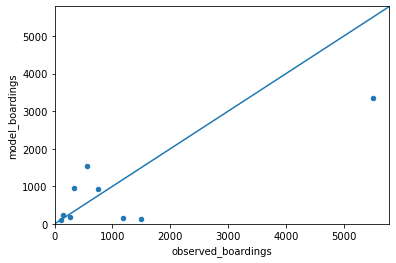

In [17]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4203,Annapolis Foot Ferry,819
2,4200,Bremerton-Seattle Fa,490
3,4201,Bremerton-Port Orcha,447
0,1973,E,336
1,1975,N,191
11,5007,Point Defiance - Tah,77
7,5002,Bainbridge Island -,61
10,5005,Vashon Island - Faun,58
9,5004,Fauntleroy - Southwo,29
6,5001,Kingston - EdmondsE,17


#### Rail

In [19]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,Link Red Line,"79,522","78,026","-1,496",-1.88%
1,Sounder South,"6,038","12,158","6,120",101.36%
2,Sounder North,316,18,-298,-94.30%


r^2 : 0.9967772745786729


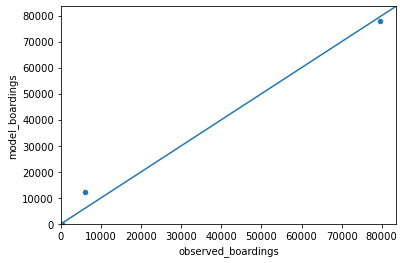

In [20]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [21]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('model_boardings', ascending=False)

,description,observed_boardings,model_boardings,diff,perc_diff
6,E Line RapidRide,"11,426","20,885","9,459",82.78%
4,C Line RapidRide,"7,250","14,119","6,869",94.75%
1,KC Metro 40,"7,208","12,793","5,585",77.48%
0,KC Metro 7,"9,954","11,163","1,209",12.14%
5,D Line RapidRide,"9,044","9,942",898,9.93%
10,Sound Transit 550,"3,351","9,634","6,283",187.51%
2,A Line RapidRide,"8,412","8,105",-307,-3.65%
7,F Line RapidRide,"4,748","5,806","1,058",22.28%
3,B Line RapidRide,"4,177","4,380",203,4.86%
9,First Hill Streetcar,"3,900","1,370","-2,531",-64.88%


r^2 : 0.8072386745657423


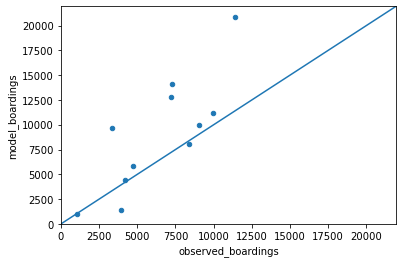

In [22]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.9135571262720011
r^2 Everett Transit: 0.9488895248377024
r^2 King County Metro: 0.9003651679287995
r^2 Kitsap Transit: 0.6102722229242511
r^2 Pierce Transit: 0.7831322219145825
r^2 Sound Transit: 0.9885842382425686
r^2 Washington Ferries: 0.8649304870331177


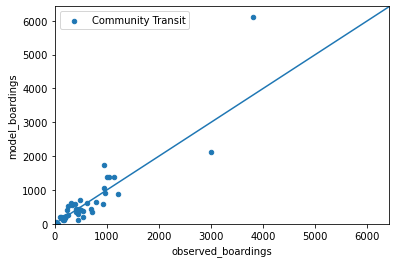

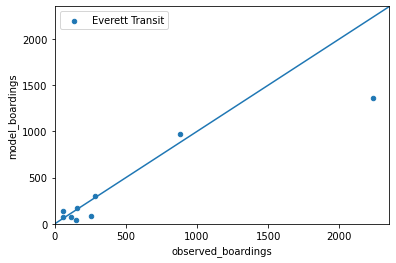

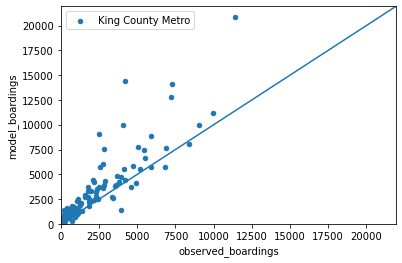

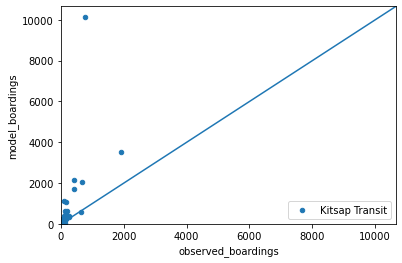

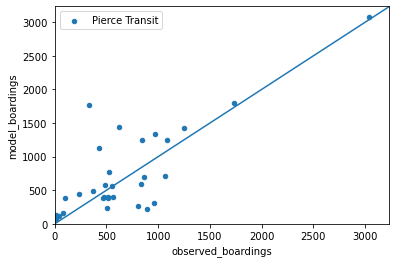

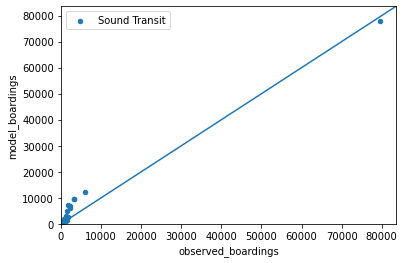

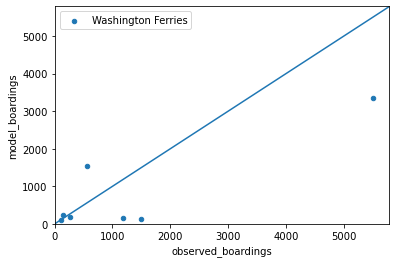

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings', label=agency)
        lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['model_boardings']-df['observed_boardings']
df['percent_diff'] = df['diff']/df['observed_boardings']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_boardings,model_boardings,diff,percent_diff
station_name,,,,
Husky Stadium,"6,134","4,492","-1,642",-26.77%
Westlake,"8,845","9,102",257,2.90%
University St,"4,324","6,094","1,770",40.93%
Pioneer Square,"2,400","5,070","2,670",111.24%
Int'l District,"4,399","1,759","-2,640",-60.01%
Capitol Hill,"7,667","6,368","-1,299",-16.94%
Stadium,"1,731",521,"-1,210",-69.92%
SODO,"1,669","3,239","1,570",94.07%
Beacon Hill,"2,147","1,025","-1,122",-52.26%


Sound Transit Station Groupings

In [25]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_boardings','model_boardings']]
df_combined['diff'] = df_combined['model_boardings']-df_combined['observed_boardings']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_boardings']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_boardings,model_boardings,diff,percent_diff
station_group,,,,
Husky Stadium,"6,134","4,492","-1,642",-26.77%
Capitol Hill,"7,667","6,368","-1,299",-16.94%
Westlake/University St,"13,169","15,196","2,027",15.39%
Pioneer Square/Int'l District,"6,799","6,829",30,0.44%
Stadium/SODO,"3,400","3,760",360,10.58%
Beacon Hill/Mount Baker,"4,008","2,249","-1,759",-43.89%
Columbia City,"1,630","1,179",-451,-27.70%
Othello/Rainier Beach,"3,525","2,619",-906,-25.70%
Tukwila Int'l Blvd,"2,298","1,863",-435,-18.91%


# Stop Transfers

### Light Rail

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.92,-99.00,99.92,-100.92%
Westlake,0.16,0.36,-0.20,-55.05%
University St,0.27,0.20,0.07,33.13%
Pioneer Square,0.43,0.16,0.27,171.29%
Int'l District,0.65,0.45,0.20,43.39%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.26,0.12,0.14,119.87%
SODO,0.56,0.31,0.25,78.64%
Beacon Hill,0.36,0.35,0.01,1.80%


# Externals

In [30]:
# df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')

# pd.options.display.float_format = '{:0,.0f}'.format
# df = df.drop('diff', axis=1)
# df['diff'] = df['modeled']-df['observed']
# df = df.fillna(0)
# df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
# df['percent_diff'] = df['diff']/df['observed']
# df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

# df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
# df.replace('nan', '', regex=True)

# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

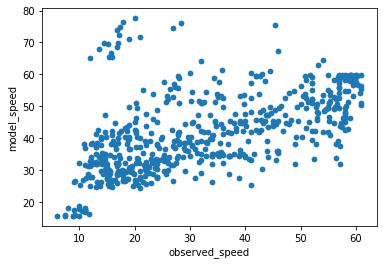

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

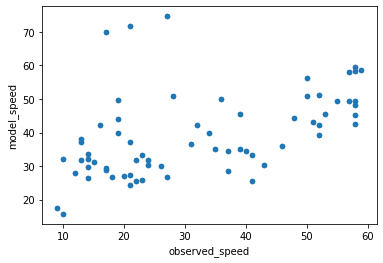

In [32]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [33]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,45,58
15,Everett to Seattle - SB,27,27
24,Tacoma to Seattle - NB,30,24
33,Seattle to Tacoma - SB,43,58
42,Bellevue to Lynnwood - NB,50,57
51,Lynnwood to Bellevue - SB,26,22
60,Tukwila to Bellevue - NB,27,20
69,Bellevue to Tukwila - SB,30,43
78,Auburn to Renton - NB,32,22
87,Renton to Auburn - SB,49,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

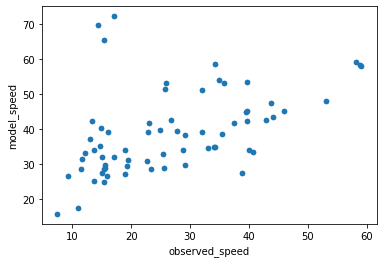

In [34]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [35]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,29,23
10,Everett to Seattle - SB,39,28
19,Tacoma to Seattle - NB,42,43
28,Seattle to Tacoma - SB,33,25
37,Bellevue to Lynnwood - NB,29,26
46,Lynnwood to Bellevue - SB,42,40
55,Tukwila to Bellevue - NB,30,29
64,Bellevue to Tukwila - SB,27,19
73,Auburn to Renton - NB,47,44
82,Renton to Auburn - SB,35,34
